# Метод условного градиента aka Франка-Вольфа

## Что такое "простое множество"?

- Множество, для которого легко вычислить проекцию
- Альтернативный способ идентификации простого множества основан на следующем предположении

**Определение.** Множество $D$ будем называть *простым*, если можно найти решение следующей задачи

$$
\min_{x \in D} c^{\top}x
$$

существенно быстрее (чаще всего аналитически) по сравнению с решением исходной задачи минимизации.

## Примеры простых множеств

- Полиэдральное множество - задача линейного программирования вместо квадратичного программирования
- Симплекс - $x^* = e_i$, где $c_i = \max\limits_{k = 1,\ldots, n} c_k$
- Лоренцев конус - $x^* = -\frac{ct}{\| c\|_2}$
- Все остальные множества из предыдущего определения

**Замечание 1:** отличие этого определения от предыдущего в линейности целевой функции (была квадратичная), поэтому простых множеств для этого определения больше.

**Замечание 2:** иногда на допустимое множество легко найти проекцию, но задача линейного программирования является неограниченной. Например, для множества 

$$
D = \{ x \in \mathbb{R}^n \; | \; x_i \geq 0 \},
$$ 

проекция на которое очевидна, решение задачи линейного программирования равно $-\infty$, если есть хотя бы одна отрицательная компонента вектора $c$. Теорема с объяснением будет ниже.

## Метод условного градиента <br> (aka Frank-Wolfe algorithm (1956))


$$
\min_{x \in D} f(x)
$$

**Идея**: делать шаг не по градиенту, а по направлению, которое точно не выведет из допустимого множества.

Аналогия с градиентным спуском: линейная аппроксимация **на допустимом множестве**:

$$
f(x_k + s_k) = f(x_k) + \langle f'(x_k), s_k \rangle \to \min_{{\color{red}{s_k \in D}}}
$$

## Условный градиент

**Определение** Направление $s_k - x_k$ называют *условным градиентом* функции $f$ в точке $x_k$ на допустимом множестве $D$.

## Псевдокод
```python
def FrankWolfe(f, gradf, linprogsolver, x0, tol):
    
    x = x0
    
    while True:
        
        gradient = gradf(x)
        
        s = linprogsolver(gradient)
        
        alpha = get_step_size(s, x, f)
        
        x = x + alpha * (s - x)
        
        if check_convergence(x, f, tol):
            
            break
            
    return x
```

## Выбор шага

- Постоянный шаг: $\alpha_k = \alpha$
- Убывающая последовательность, стандартный выбор $\alpha_k = \frac{2}{k + 2}$
- Наискорейший спуск:
$$
\min_{{\color{red}{0 \leq \alpha_k \leq 1}}} f(x_k + \alpha_k(s_k - x_k))
$$
- Линейный поиск по правилу Армихо: должно выполняться условие

$$
f((x_k + \alpha_k(s_k - x_k)) \leq f(x_k) + c_1 \alpha_k \langle f'(x_k), s_k - x_k \rangle
$$

Начинать поиск нужно с $\alpha_k = 1$

## Критерий остановки

- Так как показана сходимость к предельной точке $x^*$, то критерием остановки является сходимость по аргументу
- Если $f(x)$ выпукла, то $f(s) \geq f(x_k) + \langle f'(x_k), s - x_k \rangle$ для любого вектора $s$, а значит и для любого $s \in D$. Следовательно

$$
f(x^*) \geq f(x_k) + \min_{s \in D} \langle f'(x_k), s - x_k\rangle
$$

или
 
$$
f(x_k) - f(x^*) \leq -\min_{s \in D} \langle f'(x_k), s - x_k\rangle = \max_{s \in D} \langle f'(x_k), x_k - s\rangle =\max_{s \in D} -\langle f'(x_k), s \rangle = - \min_{s \in D} \langle f'(x_k), s \rangle =  g(x_k)
$$

Получили аналог зазора двойственности для контроля точности и устойчивости решения.

## Аффинная инвариантность

- Метод условного градиента является аффинно инвариантным относительно сюръективных отображений
- Скорость сходимости и вид итерации не меняется

## Теорема сходимости (лекции)

**Теорема 4.2.1.** Пусть $X$ - **выпуклый компакт** и $f(x)$ - дифференцируемая функция на $X$ с Липшицевым градиентом. Шаг выбирается по правилу Армихо. Тогда **для любого ${\color{red}{x_0 \in X}}$**
- метод условного градиента генерирует последовательность $\{x_k\}$, которая имеет предельные точки
- любая предельная точка $x^*$ является **стационарной**
- если $f(x)$ выпукла на $X$, то $x^*$ - решение задачи

## Теоремы сходимости

**Теорема (прямая).([Convex Optimization: Algorithms and Complexity, Th 3.8.](https://arxiv.org/abs/1405.4980))** Пусть $f$ выпуклая и дифференцируемая функция и её градиент Липшицев с константой $L$. Множество $X$ - выпуклый компакт диаметра $d > 0$. 
Тогда метод условного градиента с шагом $\alpha_k = \frac{2}{k + 1}$ сходится как

$$
f(x^*) - f(x_k) \leq \dfrac{2d^2L}{k + 2}, \quad k \geq 1
$$

**Теорема (двойственная) [см. эту статью](http://m8j.net/math/revisited-FW.pdf).** После выполнения $K$ итераций метода условного градиента для выпуклой и непрерывно дифференцируемой функции для функции $g$ и любого $k \leq K$ выполнено

$$
g(x_k) \leq \frac{2\beta C_f}{K+2} (1 + \delta),
$$

где $\beta \approx 3$, $\delta$ - точность решения промежуточных задач, $C_f$ - оценка кривизны $f$ на множестве $D$

$$
C_f = \sup_{x, s \in D; \gamma \in [0,1]} \frac{2}{\gamma^2}\left(f(x + \gamma(s - x)) - f(x) - \langle \gamma(s - x), f'(x)\rangle\right)
$$

Аргумент супремума так же известен как *дивергенция Брегмана*.

## Как конструктивно задать "простые" множества?

**Определение**. Atomic norm называется следующая функция 

$$
\|x\|_{\mathcal{D}} = \inf_{t \geq 0} \{ t | x \in t\mathcal{D} \}
$$

Она является нормой, если симметрична и $0 \in \mathrm{int}(\mathcal{D})$

### Сопряжённая atomic norm
$$
\|y\|^*_{\mathcal{D}} = \sup_{s \in \mathcal{D}} \langle s, y \rangle
$$

- Из определения выпуклой оболочки следует, что линейная функция достигает максимума в одной из "вершин" выпуклого множества
- Следовательно, $\| y \|^*_{\mathcal{D}} = \| y \|^*_{\mathrm{conv}(\mathcal{D})}$
- Это позволяет эффективно вычислять решение промежуточных задач для определения $s$

<img src="atomic_table.png">

Таблица взята из [статьи](http://m8j.net/math/revisited-FW.pdf)

## Разреженность vs. точность

- Метод условного градиента на каждой итерации добавляет к решению слагаемое, являющееся элементом множества $\mathcal{A}$
- Решение может быть представлено в виде комбинации элементов $\mathcal{A}$
- Теорема Каратеодори
- Число элементов может быть существенно маньше требуемого теоремой Каратеодори

## Эксперименты

## Пример

\begin{equation*}
\begin{split}
& \min \frac{1}{2}\|Ax - b \|^2_2\\
\text{s.t. } & 0 \leq x_i \leq 1
\end{split}
\end{equation*}

In [1]:
import liboptpy.constr_solvers as cs
import liboptpy.step_size as ss
import numpy as np
from tqdm import tqdm

n = 200
m = 100
A = np.random.randn(m, n)
x_true = np.random.rand(n)
b = A.dot(x_true) + 0.01 * np.random.randn(m)
eigvals = np.linalg.eigvalsh(A.T @ A)
L = np.max(eigvals)

In [2]:
import jax
import jax.numpy as jnp
import numpy as np
from jax.config import config
config.update("jax_enable_x64", True)

@jax.jit
def func(x, A, b):
    return 0.5 * jnp.linalg.norm(A.dot(x) - b)**2

f = lambda x: func(x, A, b)



grad = jax.jit(jax.grad(f))

In [3]:
def linsolver(gradient):
    x = np.zeros(gradient.shape[0])
    pos_grad = gradient > 0
    neg_grad = gradient < 0
    x[pos_grad] = np.zeros(np.sum(pos_grad == True))
    x[neg_grad] = np.ones(np.sum(neg_grad == True))
    return x

In [4]:
def projection(y):
    return np.clip(y, 0, 1)

In [5]:
def myplot(x, y, xlab, ylab, xscale="linear", yscale="log"):
    plt.figure(figsize=(10, 8))
    plt.xscale(xscale)
    plt.yscale(yscale)
    for key in y:
        plt.plot(x[key], y[key], label=key)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(loc="best", fontsize=24)
    plt.xlabel(xlab, fontsize=24)
    plt.ylabel(ylab, fontsize=24)

In [6]:
x0 = np.random.rand(n)
    
# fw = cs.FrankWolfe(f, grad, linsolver, ss.ConstantStepSize(1e-3))
fw = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking("Armijo", init_alpha=1, rho=0.5, beta=0.1))
x_fw = fw.solve(x0=x0, max_iter=20000, tol=1e-5, disp=1)
print("Optimal value FW =", f(x_fw))

Required tolerance achieved!
Convergence in 136 iterations
Function value = 0.00013958047584760558
Difference in function values = 7.926638075741717e-06
Difference in argument = 0.0007000957750763322
Optimal value FW = 0.00013958047584760558


In [7]:
pg = cs.ProjectedGD(f, lambda x: grad(x), projection, ss.Backtracking("Armijo", init_alpha=1, beta=0.01, rho=0.5))
x_pg = pg.solve(x0=x0, max_iter=200, tol=1e-5, disp=1)
print("Optimal value PG =", f(x_pg))

Required tolerance achieved!
Convergence in 38 iterations
Function value = 0.00016537511853079468
Difference in function values = 8.919969390365154e-06
Difference in argument = 0.0008999706483878026
Optimal value PG = 0.00016537511853079468


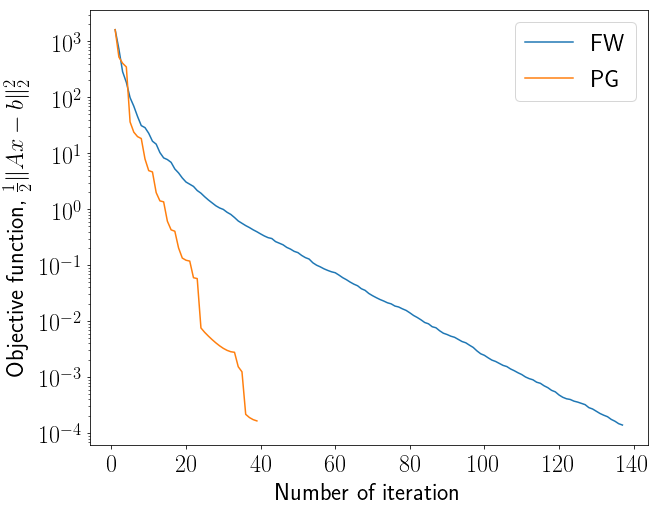

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)
y_hist_f_fw = [f(x) for x in fw.get_convergence()]
y_hist_f_pg = [f(x) for x in pg.get_convergence()]
myplot({"FW": range(1, len(y_hist_f_fw) + 1), "PG": range(1, len(y_hist_f_pg) + 1)},
       {"FW": y_hist_f_fw, "PG": y_hist_f_pg}, "Number of iteration",
       r"Objective function, $\frac{1}{2}\|Ax - b\|^2_2$")

In [9]:
import cvxpy as cvx

x = cvx.Variable(n)
obj = cvx.Minimize(0.5 * cvx.norm(A * x - b, 2)**2)
constr = [x >= 0, x <= 1]
problem = cvx.Problem(objective=obj, constraints=constr)
value = problem.solve(solver=cvx.SCS)
x_cvx = np.array(x.value).ravel()
print("CVX optimal value =", value)

CVX optimal value = -1.0918355199889685e-05


### Зависимость времени и числа итераций от точности

In [15]:
eps = [10**(-i) for i in range(8)]
time_pg = np.zeros(len(eps))
time_cg = np.zeros(len(eps))
iter_pg = np.zeros(len(eps))
iter_cg = np.zeros(len(eps))
pg = cs.ProjectedGD(f, grad, projection, ss.ConstantStepSize(1 / L))
cg = cs.FrankWolfe(f, grad, linsolver, ss.ConstantStepSize(1 / L))
for i, tol in tqdm(enumerate(eps)):
    res = %timeit -o -q pg.solve(x0=x0, tol=tol, max_iter=100000)
    time_pg[i] = res.average
    iter_pg[i] = len(pg.get_convergence())
    res = %timeit -o -q cg.solve(x0=x0, tol=tol, max_iter=100000)
    time_cg[i] = res.average
    iter_cg[i] = len(cg.get_convergence())

8it [02:10, 16.36s/it]


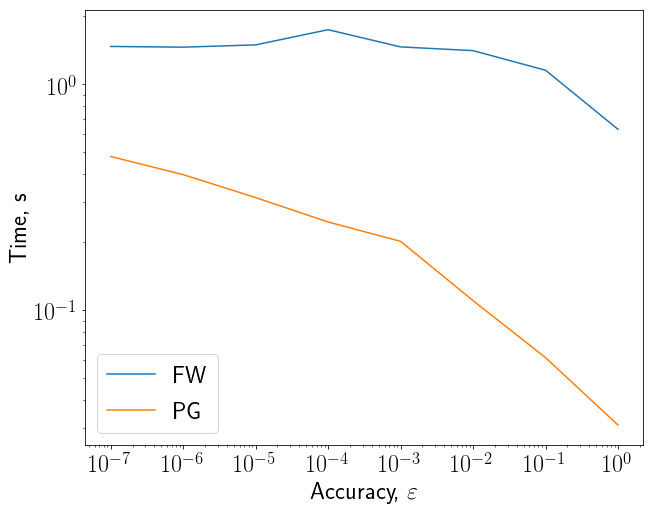

In [16]:
myplot({"FW":eps, "PG": eps}, {"FW": time_cg, "PG": time_pg}, r"Accuracy, $\varepsilon$", "Time, s", xscale="log")

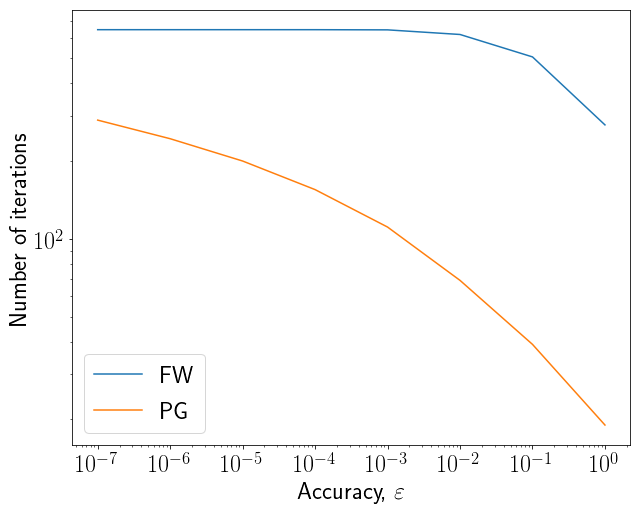

In [17]:
myplot({"FW":eps, "PG": eps}, {"FW": iter_cg, "PG": iter_pg}, r"Accuracy, $\varepsilon$", "Number of iterations", xscale="log")

## Пример 2
 Рассмотрим задачу: 
 
\begin{align*}
& \min \frac{1}{2}\|Ax - b \|^2_2 \\
\text{s.t. } & \| x\|_1 \leq 1 \\
& x_i \geq 0
\end{align*}

In [12]:
def linsolver(gradient):
    x = np.zeros(gradient.shape[0])
    idx_min = np.argmin(gradient)
    if gradient[idx_min] > 0:
        x[idx_min] = 0
    else:
        x[idx_min] = 1
    return x

In [13]:
def projection(y):
    x = y.copy()
    if np.all(x >= 0) and np.sum(x) <= 1:
        return x
    x = np.clip(x, 0, np.max(x))
    if np.sum(x) <= 1:
        return x
    n = x.shape[0]
    bget = False
    x.sort()
    x = x[::-1]
    temp_sum = 0
    t_hat = 0
    for i in range(n - 1):
        temp_sum += x[i]
        t_hat = (temp_sum - 1.0) / (i + 1)
        if t_hat >= x[i + 1]:
            bget = True
            break
    if not bget:
        t_hat = (temp_sum + x[n - 1] - 1.0) / n
    return np.maximum(y - t_hat, 0)

In [14]:
x0 = np.random.rand(n) * 10
x0 = x0 / x0.sum()
cg = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x_cg = cg.solve(x0=x0, max_iter=200, tol=1e-3)
print("Optimal value FW =", f(x_cg))

Optimal value FW = 3492.7575331665103


In [21]:
pg = cs.ProjectedGD(f, grad, projection, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
x_pg = pg.solve(x0=x0, max_iter=200, tol=1e-3)
print("Optimal value PG =", f(x_pg))
print(x_pg.sum(), x_cg.sum())

Optimal value PG = 3492.7536585492517
1.0000000000000018 1.0


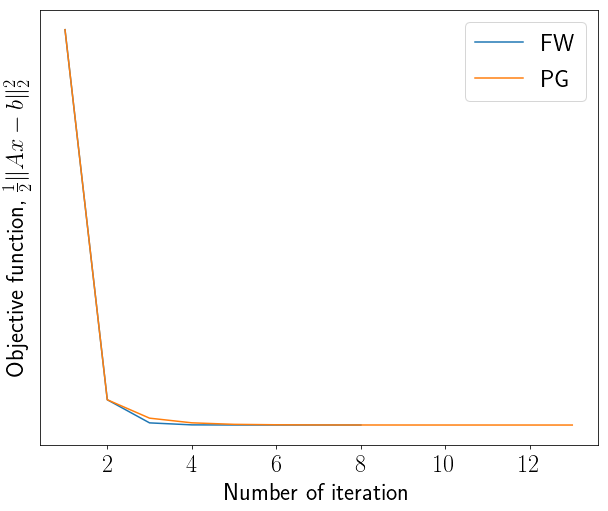

In [16]:
y_hist_f_cg = [f(x) for x in cg.get_convergence()]
y_hist_f_pg = [f(x) for x in pg.get_convergence()]
myplot({"FW": range(1, len(y_hist_f_cg) + 1), "PG": range(1, len(y_hist_f_pg) + 1)},
       {"FW": y_hist_f_cg, "PG": y_hist_f_pg}, "Number of iteration",
       r"Objective function, $\frac{1}{2}\|Ax - b\|^2_2$")

### Зависимость времени и числа итераций от точности

In [24]:
eps = [10**(-i) for i in range(8)]
time_pg = np.zeros(len(eps))
time_cg = np.zeros(len(eps))
iter_pg = np.zeros(len(eps))
iter_cg = np.zeros(len(eps))
pg = cs.ProjectedGD(f, grad, projection, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
cg = cs.FrankWolfe(f, grad, linsolver, ss.Backtracking(rule_type="Armijo", rho=0.5, beta=0.1, init_alpha=1.))
for i, tol in tqdm(enumerate(eps)):
    res = %timeit -o -q pg.solve(x0=x0, tol=tol, max_iter=100000)
    time_pg[i] = res.average
    iter_pg[i] = len(pg.get_convergence())
    res = %timeit -o -q cg.solve(x0=x0, tol=tol, max_iter=100000)
    time_cg[i] = res.average
    iter_cg[i] = len(cg.get_convergence())

8it [02:07, 15.99s/it]


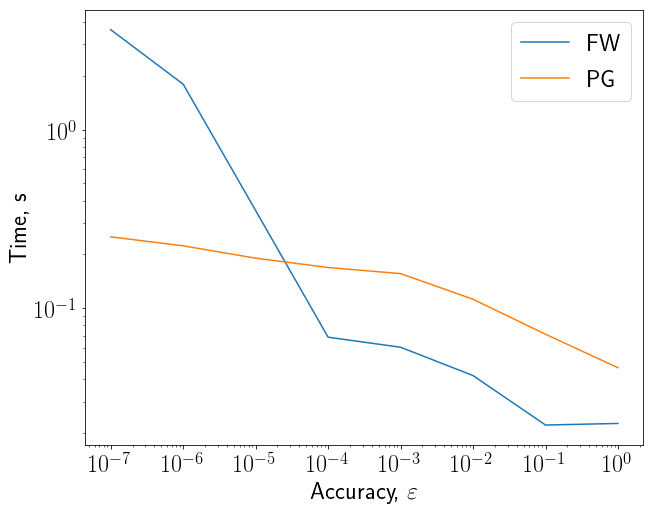

In [25]:
myplot({"FW":eps, "PG": eps}, {"FW": time_cg, "PG": time_pg}, 
       r"Accuracy, $\varepsilon$", "Time, s", xscale="log")

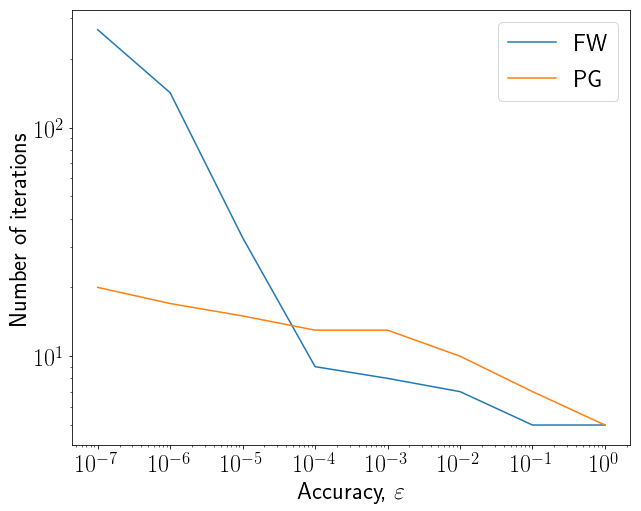

In [26]:
myplot({"FW": eps, "PG": eps}, {"FW": iter_cg, "PG": iter_pg}, 
       r"Accuracy, $\varepsilon$", "Number of iterations", xscale="log")

In [29]:
x = cvx.Variable(n)
obj = cvx.Minimize(0.5 * cvx.norm2(A * x - b)**2)
constr = [cvx.norm(x, 1) <= 1, x >= 0]
problem = cvx.Problem(objective=obj, constraints=constr)
value = problem.solve(solver=cvx.SCS, verbose=True)
x_cvx = np.array(x.value).ravel()
print("CVX optimal value =", value)

----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 21204, CG tol ~ 1/iter^(2.00)
eps = 1.00e-04, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 402, constraints m = 705
Cones:	linear vars: 601
	soc vars: 104, soc blks: 2
Setup time: 1.29e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf       nan      -inf       inf       inf  2.25e-03 
   100| 1.17e+00  2.50e-01  5.96e-04  6.96e+02  6.97e+02  2.66e-16  4.04e-02 
   200| 5.43e-01  6.02e-02  1.14e-04  1.12e+03  1.12e+03  1.75e-16  1.02e-01 
   300| 5.11e-01  3.87e-02  4.50

## Pro & Contra

Pro
- Оценка сходимости для функционала **не зависит** от размерности
- Если множество - многоугольник, то $x_k$ - выпуклая комбинация $k$ вершин многоугольника - разреженная решение для $k \ll n$
- Если множество выпуклая комбинация некоторых элементов, то решение - линейная комбинация подмножества этих элементов
- Сходимость по функционалу не улучшаема даже для сильно выпуклых функций
- Упрощение понятия "простое множество"
- Существует подобие зазора двойственности и теоретические результаты о сходимости

Contra
- Сходимость по функционалу только сублинейная вида $\frac{C}{k}$
- Не обобщается на негладкие задачи

## Резюме
- Множество простой структуры
- Проекция
- Метод проекции градиента
- Метод условного градиента